In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

# Data Import

In [27]:
data = pd.read_csv("admission_data.csv") 
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Preprocessing

In [23]:
print("Dataset Shape:", data.shape)

Dataset Shape: (400, 9)


In [24]:
data.columns = data.columns.str.strip()

In [25]:
print("Dataset Shape:", data.shape)

Dataset Shape: (400, 9)


In [5]:
print("\nMissing Values:\n", data.isnull().sum().sum())


Missing Values:
 0


# Features

In [6]:
X = data.drop('Chance of Admit', axis=1)
y_reg = data['Chance of Admit']
y_clf = (y_reg >= 0.75).astype(int)

# Train

In [7]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Regression Models

In [9]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_reg)
y_pred_lr = lr.predict(X_test_scaled)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lr)))


Linear Regression RMSE: 0.06794550952582495


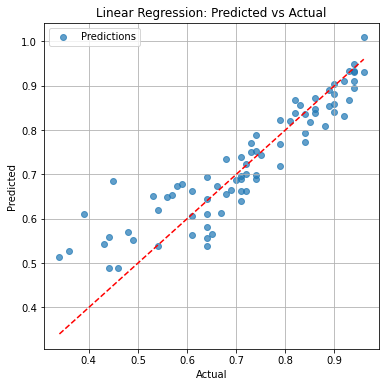

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_lr, alpha=0.7, label='Predictions')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

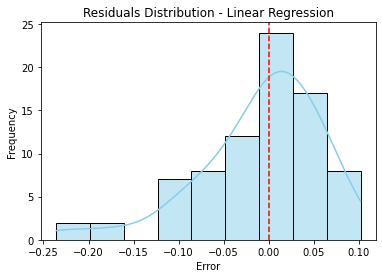

In [11]:
residuals = y_test_reg - y_pred_lr
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color="skyblue")
plt.title("Residuals Distribution - Linear Regression")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()

In [12]:
# 2. Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train_reg)
y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lasso)))


Lasso Regression RMSE: 0.0717475014715938


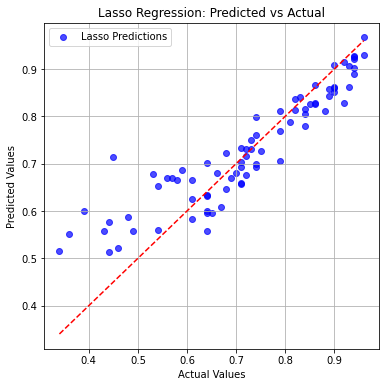

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_lasso, alpha=0.7, color='blue', label='Lasso Predictions')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()


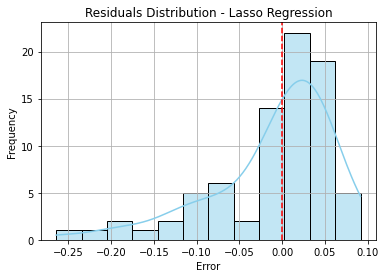

In [14]:
lasso_residuals = y_test_reg - y_pred_lasso
plt.figure(figsize=(6, 4))
sns.histplot(lasso_residuals, kde=True, color="skyblue")
plt.title("Residuals Distribution - Lasso Regression")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


In [15]:
# 3. Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train_reg)
y_pred_poly = poly_lr.predict(X_test_poly)
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_poly)))


Polynomial Regression RMSE: 0.06810570641316634


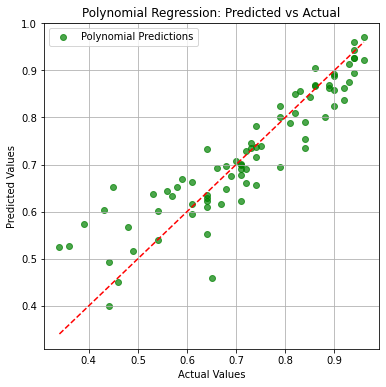

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_poly, alpha=0.7, color='green', label='Polynomial Predictions')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()


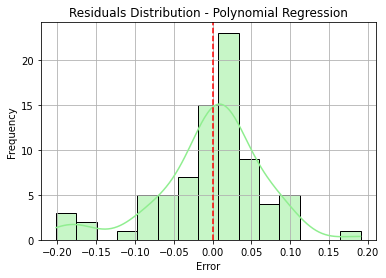

In [17]:
poly_residuals = y_test_reg - y_pred_poly
plt.figure(figsize=(6, 4))
sns.histplot(poly_residuals, kde=True, color="lightgreen")
plt.title("Residuals Distribution - Polynomial Regression")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


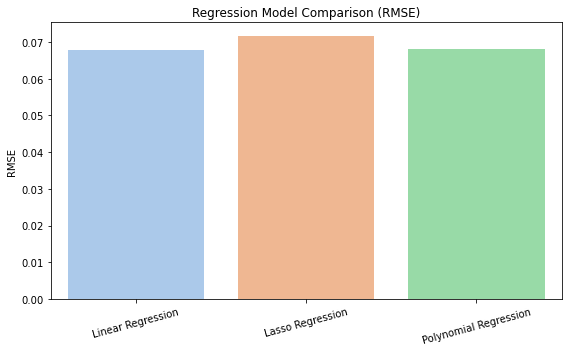

In [18]:
rmse_values = {
    'Linear Regression': np.sqrt(mean_squared_error(y_test_reg, y_pred_lr)),
    'Lasso Regression': np.sqrt(mean_squared_error(y_test_reg, y_pred_lasso)),
    'Polynomial Regression': np.sqrt(mean_squared_error(y_test_reg, y_pred_poly))
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(rmse_values.keys()), y=list(rmse_values.values()), palette='pastel')
plt.title('Regression Model Comparison (RMSE)')
plt.ylabel('RMSE')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# Classification Models

In [19]:
# 4. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train_clf)
y_pred_logreg = logreg.predict(X_test_scaled)

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_logreg))


Logistic Regression Results
Accuracy: 0.925
Confusion Matrix:
 [[42  5]
 [ 1 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        47
           1       0.86      0.97      0.91        33

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [20]:
#5. KNN Classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_clf)
y_pred_knn = knn.predict(X_test_scaled)

print("\nKNN Classification Results")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_knn))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_knn))


KNN Classification Results
Accuracy: 0.9
Confusion Matrix:
 [[42  5]
 [ 3 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.86      0.91      0.88        33

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



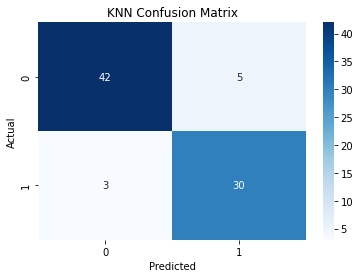

In [21]:
sns.heatmap(confusion_matrix(y_test_clf, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()